# L2.3 Linear discriminant analysis

A lo largo de este curso estaremos trabajando con estas *Jupyter Notebooks*, tratando de poner en práctica los conceptos aprendidos en cada módulo. Pero, también las utilizaremos como herramienta de lectura para, antes de programar nuestro propio código, conocer cómo se usan algunas funciones, aprender sobre distintas librerías, etc.

En esta lectura generaremos modelos de clasificación usando linear discriminant analysis.

Por favor no modifiques las celdas con las instrucciones, y solamente escribe código en las celdas donde así se te indica. **Si en algún momento seleccionas por error una celda de instrucciones y su apariencia cambia, simplemente presiona "Ctrl + Enter".**

Dentro de las celdas de código, las líneas que inician con un "\#" son comentarios y no se ejecutarán, simplemente sirven como instrucciones o descripciones útiles para ustedes.

En esta ocasión trabajaremos con la base de datos de UCI titulada *Wine*, una base de datos que contiene 178 observaciones y 13 variables (para las que no tenemos información específica de unidades):
 - `Class`. Describe la variedad de uva (1, 2, o 3)
 - `Alcohol`.
 - `Malicacid`.
 - `Ash`.
 - `Alcalinity_of_ash`.
 - `Magnesium`.
 - `Total_phenols`.
 - `Flavanoids`.
 - `Nonflavanoid_phenols`.
 - `Pronathocyanins`.
 - `Color_intensity`.
 - `Hue`.
 - `0D280_0D315_of_diluted_wine`.
 - `Proline`.
 
Los datos fueron proporcionados por Stefan Aeberhard y M. Forina, y se descargaron directamente del [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine).
 
Empecemos este ejercicio importando los datos al ambiente de trabajo. Inmediatamente después, crea un subconjunto de datos donde solamente se cuente con información de las clases 1 y2, así como de las variables `Class` y `Flavanoids`. Adicionalmente, generemos una gráfica donde se aprecien las densidades (histograma suavizado) de la variable `Flavanoids` para las clases 1 y 2. Para lograrlo, importa primero las librerías correspondientes (te recomiendo usar seaborn para la generación de histogramas), después, usa la función `kdeplot` de seaborn para generar la gráfica (definiendo el parámetro `hue` con la variable que quieres que se use para estratificar).<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import pandas as pd<br>
    import matplotlib.pyplot as plt<br>
    import seaborn as sns<br>
    db = pd.read_csv("L2.3 Wine.csv")<br>
    db2 = db[db['Class'] != 3][['Class', 'Flavanoids']]<br>
    %matplotlib inline<br>
    sns.kdeplot(data=db2, x='Flavanoids', hue='Class', alpha=0.3, fill=True)
</details>

   Class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   
2      1    13.16       2.36  2.67               18.6        101   
3      1    14.37       1.95  2.50               16.8        113   
4      1    13.24       2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  0D280_0D315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05        

<Axes: xlabel='Flavanoids', ylabel='Density'>

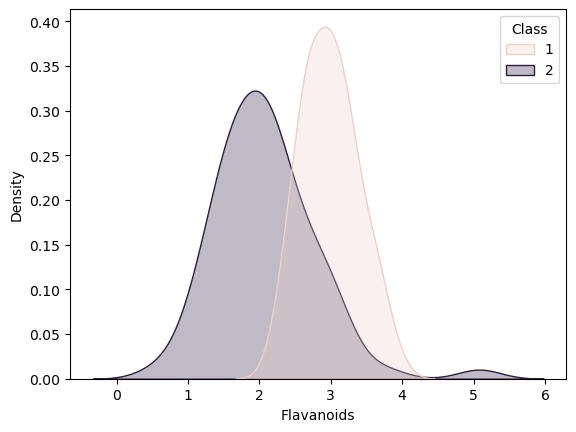

In [2]:
# Importa las librerías necesarias



# Lee el archivo

# Genera el subconjunto de datos

# Genera la gráfica (e incluye la función mágica)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
db = pd.read_csv("L2.3 Wine.csv")
print(db.head())
db2 = db[db['Class'] != 3][['Class', 'Flavanoids']]
%matplotlib inline
sns.kdeplot(data=db2, x='Flavanoids', hue='Class', alpha=0.3, fill=True)


Ahora, escalemos nuestra variable para que tenga media de 0 y desviación estándar de 1. En realidad, este proceso no provocará diferencias en nuestros resultados, pero para algunas situaciones ayudará a que el algoritmo logre converger de manera más sencilla. Para lograrlo, utilizaremos la función `StandardScaler` de sklearn.reprocessing. Para confirmar nuestros resultados, imprime el promedio y desviación estándar de la variable, antes y después del proceso de estandarización.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.preprocessing import StandardScaler<br>
    db2['Flavanoids_scaled'] = StandardScaler().fit_transform(db2[['Flavanoids']])<br>
    print("Antes:",db2['Flavanoids'].mean(),"(",db2['Flavanoids'].std(),")")<br>
    print("Después:",db2['Flavanoids_scaled'].mean(),"(",db2['Flavanoids_scaled'].std(),")")
</details>

In [17]:
# Importar función

# Estandarizar datos

# Imprimir media y desviación estándar de valores antes y después de estandarización



Solo por esta ocasión, tratemos de programar el algoritmo de forma manual y desde cero. Iniciemos entonces calculando las probabilidades *a priori*, así como el promedio de cada clase y la varianza ponderada. Recuerda que la probabilidad *a priori* no es otra cosa más que la proporción de cada clase con respecto a la población. Para calcular las proporciones, puedes simplemente usar la función `value_counts` especificando el parámetro `normalize=True`. Para calcular el promedio por clase puedes hacer uso de la función `groupby` de pandas, y para calcular la desviación estándar ponderada, te recomiendo calcular el numerador y denominador de forma independiente (recuerda que la fórmula de la presentación es para la varianza ponderada, que no es otra cosa más que el cuadrado de la desviación estándar ponderada).<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    prior = db2.Class.value_counts(normalize=True)<br>
    mu = db2.groupby('Class')['Flavanoids_scaled'].mean()<br>
    numerator = sum((db2[db2['Class'] == 1]['Flavanoids_scaled'] - mu[1]) ** 2) + sum((db2[db2['Class'] == 2]['Flavanoids_scaled'] - mu[2]) ** 2)<br>
    denominator = len(db2) - 2<br>
    sdT = (numerator / denominator) ** 0.5<br>
    print(prior)<br>
    print(mu)<br>
    print(sdT)
</details>

In [18]:
# Calcula probabilidades a priori

# Calcula promedio por clase

# Calcula la desviación estandar ponderada


# Imprime resultados




Ahora calculemos $f_k(x)$, la función de densidad de probabilidad, para cada clase. En este ejemplo yo calculo cada función de forma independiente, pero podrías realizar el mismo proceso en una sola instrucción si haces uso de funciones de *broadcasting* de numpy, como `newaxis`. Independientemente, ya que estaremos usando el valor de $\pi$, inicia importando numpy. Una vez calculados ambos vectores, genera un data frame de pandas donde unas ambos objetos e imprime las primeras 5 filas.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import numpy as np<br>
    f_class1 = (1 / (np.sqrt(2 * np.pi) * sdT)) * np.exp(-0.5 * (1 / sdT**2) * (db2['Flavanoids_scaled'] - mu[1])**2)<br>
    f_class2 = (1 / (np.sqrt(2 * np.pi) * sdT)) * np.exp(-0.5 * (1 / sdT**2) * (db2['Flavanoids_scaled'] - mu[2])**2)<br>
    f = pd.DataFrame({"f_class1":f_class1, "f_class2":f_class2})<br>
    print(f.head())
</details>

In [19]:
# Importar librería

# Calcula f de la clase 1

# Calcula f de la clase 2

# Combinar valores

# Imprime primeras 5 filas


Muy bien, ahora calculemos la probabilidad de cada clase. Ya que solo estamos trabajando con 2 clases, te recomiendo que calcules la probabilidad de la clase 1, y que definas la probabilidad de la clase 2 como $1 - p_1(x)$. Cuando hagas referencia a uno de los dos valores de `prior`, toma en cuenta que por la forma en que se calculó, se debe hacer referencia a la clase a la que pertenece (1 o 2), y no a su posición dentro del vector (0 y 1).<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    p1 = (f_class1 * prior[1]) / (f_class1 * prior[1] + f_class2 * prior[2])<br>
    p2 = 1 - p1<br>
    print(p1.head())
</details>

In [20]:
# Calcular probabilidad de pertenecer a clase 1

# Calcular probabilidad de pertenecer a clase 2

# Imprimir primeros 5 valores de p1


Con esta información ya podemos generar una clasificación. Por esta ocasión, definamos el umbral como 0.5, de forma que cualquier probabilidad mayor a dicho umbral, dentro de `p1`, indica que dicha observación pertenece a la clase 1. Este proceso de puede realizar de forma muy sencilla con la función `where` de numpy. Dicha función es básicamente un `ifelse`, es decir, se le indica una comparación, un valor si la comparación es positiva, y otro valor si la comparación es negativa. Al finalizar, imprime los primeros 5 valores, pero toma en cuenta que al tratarse de un arreglo de numpy, no se cuenta con un atributo `head`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    yhat = np.where(p1>0.5,1,2)<br>
    print(yhat[:5])
</details>

In [21]:
# Genera clasificación

# Imprimer primeros 5 valores


Listo, utilizamos el método de linear discriminant analysis para obtener un modelo de clasificación. En esta ocasión no realizamos un proceso de separación de datos en entrenamiento y prueba, porque simplemente nos interesaba comprender en qué consiste esta metodología y qué calculos y valores están implicados en la misma. Sin embargo, ya debe ser obvio que ante un problema de clasificación es completamente necesario el entrenar al modelo con datos independientes a los usados para validar los resultados.

Ahora tratemos de comprender de forma sencilla en qué consiste esta metodología al calcular y graficar el límite de decisión. Para calcularlo, simplemente utiliza la función que revisamos en la presentación. Para visualizarlo, primero genera la misma gráfica que creamos previamente (pero para los datos estandarizados) y simplemente agrega una línea vertical usando la función `axvline`, dando como parámetro el valor del límite de decisión.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    boundary = (mu[1]**2 - mu[2]**2 + 2 * sdT**2 * (np.log(prior[2]) - np.log(prior[1]))) / (2 * (mu[1] - mu[2]))<br>
    sns.kdeplot(data=db2, x='Flavanoids_scaled', hue='Class', alpha=0.3, fill=True)<br>
    plt.axvline(boundary)<br>
</details>

In [23]:
# Calcula el límite de decisión

# Grafica la densidad estratificada por clase

# Agrega el límite de decisión a la gráfica


Esa gráfica nos muestra que esta metodología simplemente está generando una línea que separa nuestras clases de forma que se optimice la cantidad de predicciones correctas. Por lo mismo, y ya habiendo comprendido previamente la importancia de métricas de calidad distintas a la exactitud, podemos comprender que esta metodología podría entregar resultados no deseados si se cuentas con datos muy desbalanceados.

Ahora, para la parte que suele causarnos algo de dolor tras haber trabajado arduamente en generar todo este proceso. Utilicemos la función `LinearDiscriminantAnalysis` de sklearn.discriminant_analysis para crear un modelo que se entrenará usando los datos estandarizados. Después, usa la función `predict_proba` y `predict` para calcular las probabilidad y clasificar las observaciones, respectivamente. Finalmente, imprime los valores obtenidos manualmente y los obtenidos por esta función para comprobar que se obtienen los mismos resultados (solo los primeros 10 valores).<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA<br>
    ldaModel=LDA().fit(db2[['Flavanoids_scaled']],db2.Class)<br>
    pr=ldaModel.predict_proba(db2[['Flavanoids_scaled']])<br>
    cl=ldaModel.predict(db2[['Flavanoids_scaled']])<br>
    print(pr[:10])<br>
    print(p1[:10])<br>
    print(cl[:10])<br>
    print(yhat[:10])
</details>

In [22]:
# Importar función

# Crear y entrenar modelo

# Calcular probabilidades

# Clasificar

# Comparar probabilidades


# Comparar clases



Revisemos ahora la calidad de nuestro modelo (insisto, deberíamos hacer esto en un dataset de prueba, pero de momento no nos enfocaremos en eso). Utilizaremos dos funciones la librería metrics de sklearn: `confusion_matrix` y `classification_report`. Con la primera, obviamente, podremos imprimir la matriz de confusión de nuestro modelo. Con la segunda podremos desplegar de manera sencilla métricas como la sensibilidad, precisión f1 score, etc. Para ambas funciones, simplemente se definen como parámetros las clases verdaderas en primer lugar, y las clases que el modelo predijo en segundo lugar.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.metrics import confusion_matrix, classification_report<br>
    cm = confusion_matrix(db2['Class'], yhat)<br>
    print(cm)<br>
    rep = classification_report(db2['Class'], yhat)<br>
    print(rep)
</details>

In [24]:
#Importar funciones

# Generar la matriz de confusión

# Imprimir la matriz de confusión

# Generar el reporte de clasificación

# Imprimir el reporte de clasificación


En estos resultados se observa que el modelo tiene un buen desempeño a pesar de estar limitado a una sola variable: la exactitud es de 82%, la sensibilidad (recall de clase 1) es de 85%, la especificidad (recall de clase 2) es de 80% y el f1 score (el de la clase 1, que es como lo analizamos en la presentación) de 0.81. Es importante mencionar que la forma en que esta función despliega los datos de la matriz de confusión no es idéntica a como la vimos en clase, aquí las filas son las clases reales y las columnas son las predicciones.

Realicemos una prueba rápida y revisemos qué pasaría si cambiáramos nuestro umbral de predicción de 0.5 a 0.25. Es decir, el modelo tenderá a clasificar a una observación como clase 1 si se tiene una probabilidad de pertenecer a dicha clase de al menos 25%. Sin tener que revisar resultados, sabemos que debemos esperar un sistema más sensible (no habrá muchas observaciones de clase 1 que se nos escapen). Genera la nueva matriz de confusión y el nuevo reporte sustituyendo la variable `yhat` por la función `where` de numpy con un umbral de 0.25.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    cm = confusion_matrix(db2['Class'], np.where(p1>0.25,1,2))<br>
    print(cm)<br>
    rep = classification_report(db2['Class'], np.where(p1>0.25,1,2))<br>
    print(rep)
</details>

In [25]:
# Generar la matriz de confusión

# Imprimir la matriz de confusión

# Generar el reporte de clasificación

# Imprimir el reporte de clasificación


Como era de esperarse, la sensibilidad aumentó. De hecho, llegó hasta un 100%. Sin embargo, la exactitud bajó a 79% y la especificidad a 62%. Esto nos demuestra la susceptibilidad de nuestros resultados a la selección del umbral de decisión. Recuerda que la curva ROC puede ser utilizada para revisar el comportamiento de un modelo para todos los umbrales posibles que se pueden seleccionar. Grafiquemos dicha curva y calculemos su área bajo la curva.

Para lograrlo, usaremos las funciones `roc_curve` y `auc` de la librería metrics de sklearn. La primera función simplemente considera como atributos las clases verdaderas y las probabilidades calculadas por el modelo, y regresa el *false positive rate* (1 - especificidad), *true positive rate* (sensibilidad) y los umbrales utizados. La segunda función toma como entradas los valores de fpr y tpr obtenidos de la función previa y regresa el área bajo la curva.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.metrics import roc_curve, auc<br>
    fpr, tpr, thresholds = roc_curve(db2['Class'], p1, pos_label=1)<br>
    roc_auc = auc(fpr, tpr)<br>
    print("AUC =",roc_auc)<br>
    plt.plot(fpr, tpr)<br>
    plt.xlabel('1 - Especificidad')<br>
    plt.ylabel('Sensibilidad')
</details>

In [26]:
# Importar funciones

# Usar la función roc_curve para calcular fpr, tpr y thresholds

# Calcular AUC

# Imprimir AUC

# Graficar




Excelente trabajo, con esto damos por finalizada la lectura de esta sesión.